In [4]:
%run Preprocessing.ipynb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   hadm_id    int64  
 1   charttime  object 
 2   itemid     int64  
 3   value      float64
dtypes: float64(1), int64(2), object(1)
memory usage: 61.0+ MB
CPU times: user 6.48 s, sys: 364 ms, total: 6.85 s
Wall time: 6.9 s
<class 'pandas.core.frame.DataFrame'>
Index: 604291 entries, 12 to 1999999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   hadm_id    604291 non-null  int64         
 1   charttime  604291 non-null  datetime64[ns]
 2   itemid     604291 non-null  int64         
 3   value      604291 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 23.1 MB
amount:  140901
amount:  140901
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140901 entries, 0 to 140900
Data columns (total 8 columns):
 #   C

In [1]:
import pandas
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
FILENAME = '20230709_2e+06'

In [3]:
df = pandas.read_csv(f"../Data/Preprocessed/chartevents_{FILENAME}_labeled.csv", engine='python')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140901 entries, 0 to 140900
Data columns (total 9 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   hadm_id                                140901 non-null  int64  
 1   charttime                              140901 non-null  object 
 2   Heart Rate                             140901 non-null  float64
 3   Respiratory Rate                       140901 non-null  float64
 4   Non Invasive Blood Pressure systolic   140692 non-null  float64
 5   Non Invasive Blood Pressure diastolic  140692 non-null  float64
 6   O2 saturation pulseoxymetry            140897 non-null  float64
 7   Temperature Celsius                    140604 non-null  float64
 8   label                                  140901 non-null  bool   
dtypes: bool(1), float64(6), int64(1), object(1)
memory usage: 8.7+ MB


In [4]:
mark = ("Heart Rate", \
        "Respiratory Rate", \
        "Non Invasive Blood Pressure systolic", \
        "Non Invasive Blood Pressure diastolic", \
        "O2 saturation pulseoxymetry", \
        "Temperature Celsius")
df.dropna(how='any', inplace=True)
df_under, df_under_label = df[list(mark)], df.label
df_under_resample, df_under_label_resample = RandomUnderSampler(sampling_strategy='majority').fit_resample(df_under, df_under_label)
# df_under_resample = (df_under_resample - df_under_resample.mean()) / df_under_resample.std()

In [5]:
df_under_resample.sample(5)

,Heart Rate,Respiratory Rate,Non Invasive Blood Pressure systolic,Non Invasive Blood Pressure diastolic,O2 saturation pulseoxymetry,Temperature Celsius
1,102.0,25.0,95.0,57.0,100.0,37.5
13,28.0,0.0,71.0,44.0,62.0,37.1
5,56.0,15.0,158.0,69.0,92.0,37.0
17,97.0,33.0,79.0,48.0,77.0,36.8
3,93.0,20.0,102.0,88.0,92.0,36.6


In [6]:
df_under_resample.mean()

Heart Rate                                84.136364
Respiratory Rate                          20.545455
Non Invasive Blood Pressure systolic     107.136364
Non Invasive Blood Pressure diastolic     58.727273
O2 saturation pulseoxymetry               87.636364
Temperature Celsius                       36.909091
dtype: float64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df_under_resample, df_under_label_resample, test_size=0.2, stratify=df_under_label_resample)

# 決策樹

[Text(0.4, 0.875, 'x[4] <= 88.0\ngini = 0.498\nsamples = 17\nvalue = [9, 8]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.6, 0.625, 'x[5] <= 38.35\ngini = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(0.4, 0.375, 'x[3] <= 98.5\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

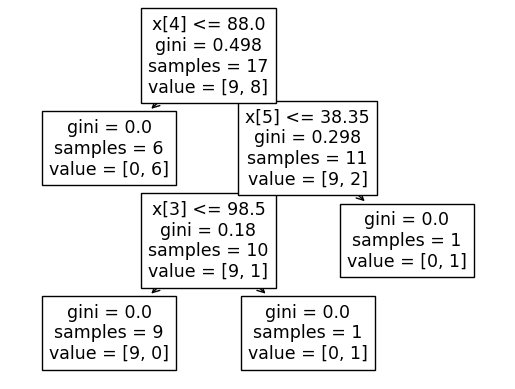

In [8]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=3)
model = model.fit(X_train, y_train)
tree.plot_tree(model)

In [9]:
from graphviz import Source
features = list(mark)
dot_data = tree.export_graphviz(model, feature_names=features)
graph = Source(dot_data)
graph.render(view=True, format="pdf", filename=f"../Charts/tree{FILENAME}")

'../Charts/tree20230709_2e+06.pdf'

In [10]:
len(X_train), len(X_test)

(17, 5)

In [11]:
cross_val_score(model, X_test, y_test, cv=5, scoring='accuracy').mean()

ValueError: n_splits=5 cannot be greater than the number of members in each class.

In [ ]:
model.score(X_test, y_test)

0.7857142857142857

In [ ]:
scores = cross_val_score(tree.DecisionTreeClassifier(max_depth=3), df_under_resample, df_under_label_resample, cv=5, scoring='accuracy')
print(scores)
print(scores.mean())

[0.64285714 0.84615385 0.92307692 0.76923077 0.69230769]
0.7747252747252749


In [ ]:
model.score

<bound method ClassifierMixin.score of DecisionTreeClassifier(max_depth=3)>

In [ ]:
A_x = X_test[y_test==True]
A_y = y_test[y_test==True]
A_x.size

42

In [ ]:
model.score(A_x, A_y)

0.8571428571428571

In [ ]:
B_x = X_test[y_test==False]
B_y = y_test[y_test==False]
B_x.size

42

In [ ]:
model.score(B_x, B_y)

0.7142857142857143

# 隨機森林

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=5)
rfc.fit(X_train, y_train)


RandomForestClassifier(n_estimators=5)

In [ ]:
rfc.score(X_test, y_test)

0.7857142857142857

In [ ]:
scores = cross_val_score(RandomForestClassifier(n_estimators=5), df_under_resample, df_under_label_resample, cv=5, scoring='accuracy')
print(scores.mean())

0.7901098901098902
